In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import os
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
!pip install ipython-sql

In [4]:
%load_ext sql

In [5]:
df=pd.read_excel('D:\Software Course\Practice\corona_vaccine_new.xlsx', 'corona_vaccine_new')

In [6]:

df.head()

,Column1,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,Algeria,DZA,2021-01-29,0,0,0,0,0,0.00,0.0,0.0,0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,1,Algeria,DZA,2021-01-30,30,0,0,30,30,0.00,0.0,0.0,1,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,2,Argentina,ARG,2020-12-29,700,0,0,0,0,0.00,0.0,0.0,0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,3,Argentina,ARG,2020-12-30,0,0,0,0,15656,0.00,0.0,0.0,346,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,4,Argentina,ARG,2020-12-31,32013,0,0,0,15656,0.07,0.0,0.0,346,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [7]:
df.shape

(1934, 16)

There are various rows carrying '0' as a value. total number of rows are 1934.

In [8]:
!pip3 install PyMySQL


In [9]:
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='********',db='jupyterpractice')




Lets Add the total_vaccinations and other columns(Summarize the data)(The data frame below was saved as a new csv file and dashboards were created)

In [10]:
QUERY='''SELECT iso_code,country, SUM(total_vaccinations) AS sum_total_vaccinations, SUM(people_vaccinated) AS total_people_vaccinated,
SUM(people_fully_vaccinated) AS total_people_fully_vaccinated, SUM(daily_vaccinations_raw) AS total_vaccinations_raw, SUM(daily_vaccinations)
AS total_daily_vaccinations, SUM(total_vaccinations_per_hundred) AS sum_total_vaccinations_per_hundred, SUM(people_vaccinated_per_hundred)
AS total_people_vaccinated_per_hundred, SUM(people_fully_vaccinated_per_hundred) AS total_people_fully_vaccinated_per_hundred,
SUM(daily_vaccinations_per_million) AS sum_total_vaccinations_per_million, vaccines, source_name
FROM corona_vaccine_new_sql
GROUP BY country'''
df1=pd.read_sql_query(QUERY,conn)
df1

,iso_code,country,sum_total_vaccinations,total_people_vaccinated,total_people_fully_vaccinated,total_vaccinations_raw,total_daily_vaccinations,sum_total_vaccinations_per_hundred,total_people_vaccinated_per_hundred,total_people_fully_vaccinated_per_hundred,sum_total_vaccinations_per_million,vaccines,source_name
0,DZA,Algeria,30.0,0.0,0.0,30.0,30.0,0.000000,0.000000,0.00,1.0,Sputnik V,Ministry of Health
1,ARG,Argentina,4251359.0,3183292.0,520621.0,118451.0,381214.0,9.420000,7.040000,1.16,8436.0,Sputnik V,Ministry of Health
2,AUT,Austria,2358998.0,2269175.0,89823.0,195561.0,187577.0,26.220000,25.210000,1.01,20828.0,Pfizer/BioNTech,Ministry of Health
3,BHR,Bahrain,3418151.0,3418151.0,0.0,110780.0,148162.0,92.340000,99.559999,0.00,49702.0,"Pfizer/BioNTech, Sinopharm",Ministry of Health
4,BEL,Belgium,3941324.0,3867539.0,73785.0,296662.0,275568.0,34.000000,33.370000,0.65,23776.0,"Moderna, Pfizer/BioNTech",Sciensano
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,TUR,Turkey,5114998.0,0.0,0.0,499803.0,200010.0,28.290000,0.000000,0.00,23156.0,Sinovac,COVID-19 Vaccine Information Platform
63,ARE,United Arab Emirates,3675903.0,3924051.0,5750000.0,1139489.0,321397.0,0.000000,0.000000,0.00,6208.0,"Pfizer/BioNTech, Sinopharm",National Emergency Crisis and Disaster Managem...
64,GBR,United Kingdom,1666290.0,1666290.0,21808.0,0.0,691655.0,53.340000,54.320000,14.89,31920.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom
65,USA,United States,2178350.0,2178350.0,0.0,57909.0,57909.0,68.469999,91.470000,13.12,47385.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention


Text(0.5, 0, 'Country')

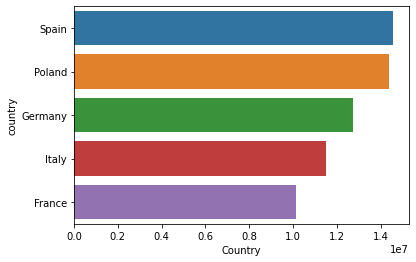

In [11]:
QUERY='''SELECT SUM(people_vaccinated) AS Total, country 
FROM corona_vaccine_new_sql
GROUP BY country
ORDER BY Total DESC LIMIT 5
'''
df3=pd.read_sql_query(QUERY,conn)
sns.barplot(x=df3['Total'], y=df3['country'])
plt.xlabel('Country')

<AxesSubplot:xlabel='sum_total_vaccinations', ylabel='total_people_vaccinated'>

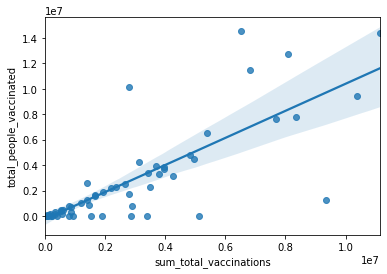

In [12]:
sns.regplot(x=df1['sum_total_vaccinations'], y=df1['total_people_vaccinated'])

In [13]:
QUERY='''SELECT * FROM corona_vaccine_new_sql'''
df_sql=pd.read_sql_query(QUERY,conn)
df_sql.dtypes

Sr                                       int64
country                                 object
iso_code                                object
date                                    object
total_vaccinations                       int64
people_vaccinated                        int64
people_fully_vaccinated                  int64
daily_vaccinations_raw                   int64
daily_vaccinations                       int64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million           int64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [14]:
df_sql.head()

,Sr,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,0,Algeria,DZA,2021-01-29,0,0,0,0,0,0.00,0.0,0.0,0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,1,Algeria,DZA,2021-01-30,30,0,0,30,30,0.00,0.0,0.0,1,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,2,Argentina,ARG,2020-12-29,700,0,0,0,0,0.00,0.0,0.0,0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,3,Argentina,ARG,2020-12-30,0,0,0,0,15656,0.00,0.0,0.0,346,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,4,Argentina,ARG,2020-12-31,32013,0,0,0,15656,0.07,0.0,0.0,346,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
